¡Hola, Marco!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

    
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
gold_recovery_train = pd.read_csv("./datasets/gold_recovery_train.csv")
gold_recovery_test = pd.read_csv("./datasets/gold_recovery_test.csv")
gold_recovery_full = pd.read_csv("./datasets/gold_recovery_full.csv")

Preparacion de datos 

abriendo los archivos y examinando los datos 

In [3]:
print(gold_recovery_train.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [4]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
print(gold_recovery_test.head())

                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777

In [6]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [7]:
print(gold_recovery_full.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [8]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Excelente trabajo con la carga de las bases de datos con los análisis iniciales de la limpieza de los datos. Solamente te recomiendo, para complementar, realizar un análisis de duplicados dado que es muy importante para asegurar que no tenemos registros que van a sesgar nuestros resultados

Comprobacion de calculo de recuperacion

In [9]:


def calculo_de_recuperacion_manual():
    calculo_de_recuperacion = []

    for i in gold_recovery_train.index:

        feed_au = gold_recovery_train.loc[i, 'rougher.input.feed_au']
        concentrate_au = gold_recovery_train.loc[i, 'rougher.output.concentrate_au']
        tail_au = gold_recovery_train.loc[i, 'rougher.output.tail_au']
        
        if pd.notna(feed_au) and pd.notna(concentrate_au) and pd.notna(tail_au):
            calculo = (concentrate_au * (feed_au - tail_au)) / (feed_au * (concentrate_au - tail_au)) * 100
            calculo_de_recuperacion.append(calculo)
        else: 
            calculo_de_recuperacion.append(None)
    return calculo_de_recuperacion
            


    

In [10]:

recuperacion_manual = calculo_de_recuperacion_manual()

# Crear DataFrame para comparar
comparacion = pd.DataFrame({
    'manual': recuperacion_manual,
    'existente': gold_recovery_train['rougher.output.recovery']
})

# Ver las primeras filas
print(comparacion.head(10))

# Calcular diferencias
comparacion['diferencia'] = comparacion['manual'] - comparacion['existente']
print(f"Diferencia promedio: {comparacion['diferencia'].mean()}")



C:\Users\anton\AppData\Local\Temp\ipykernel_10116\3085123484.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  calculo = (concentrate_au * (feed_au - tail_au)) / (feed_au * (concentrate_au - tail_au)) * 100
C:\Users\anton\AppData\Local\Temp\ipykernel_10116\3085123484.py:11: RuntimeWarning: invalid value encountered in scalar divide
  calculo = (concentrate_au * (feed_au - tail_au)) / (feed_au * (concentrate_au - tail_au)) * 100


      manual  existente
0  87.107763  87.107763
1  86.843261  86.843261
2  86.842308  86.842308
3  87.226430  87.226430
4  86.688794  86.688794
5  88.156912  88.156912
6  88.168065  88.168065
7  87.668336  87.668336
8  87.035862  87.035862
9  87.650868  87.650868
Diferencia promedio: -1.6214680221060065e-16


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
    
Excelente trabajo con el calculo de la recuperación con los calculos propios, esto ayuda mucho a comprobar los resultados. Recuerda que estos pasos son muy relevantes cuando queremos hacer los análisis de información


Analisis de las  caracteristicas no disponibles en el conjunto de prueba 

El archivo de "test" tiene 34 columnas menos que el de entrenamiento, y de las columnas mas relevantes son "final.output.recovery" y "rougher.output.recovery" 

Analisis de datos 

In [11]:
print(gold_recovery_full[['rougher.input.feed_ag', 
                         'rougher.output.concentrate_ag', 
                         'final.output.concentrate_ag']])


       rougher.input.feed_ag  rougher.output.concentrate_ag  \
0                   6.100378                      11.500771   
1                   6.161113                      11.615865   
2                   6.116455                      11.695753   
3                   6.043309                      11.915047   
4                   6.060915                      12.411054   
...                      ...                            ...   
22711               6.091855                      11.124896   
22712               6.121323                      11.425983   
22713               5.970515                       8.523497   
22714               6.048130                      11.658799   
22715               6.158718                      11.959486   

       final.output.concentrate_ag  
0                         6.055403  
1                         6.029369  
2                         6.055926  
3                         6.047977  
4                         6.148599  
...                  

In [12]:
print(gold_recovery_full[['rougher.input.feed_au', 
                         'rougher.output.concentrate_au', 
                         'final.output.concentrate_au']])

       rougher.input.feed_au  rougher.output.concentrate_au  \
0                   6.486150                      19.793808   
1                   6.478583                      20.050975   
2                   6.362222                      19.737170   
3                   6.118189                      19.320810   
4                   5.663707                      19.216101   
...                      ...                            ...   
22711               5.335862                      18.603550   
22712               4.838619                      18.441436   
22713               4.525061                      15.111231   
22714               4.362781                      17.834772   
22715               4.365491                      17.804134   

       final.output.concentrate_au  
0                        42.192020  
1                        42.701629  
2                        42.657501  
3                        42.689819  
4                        42.774141  
...                  

In [13]:
print(gold_recovery_full[['rougher.input.feed_pb', 
                         'rougher.output.concentrate_pb', 
                         'final.output.concentrate_pb']])

       rougher.input.feed_pb  rougher.output.concentrate_pb  \
0                   2.284912                       7.101074   
1                   2.266033                       7.278807   
2                   2.159622                       7.216833   
3                   2.037807                       7.175616   
4                   1.786875                       7.240205   
...                      ...                            ...   
22711               4.617558                      10.984003   
22712               4.144989                      10.888213   
22713               4.020002                       8.955135   
22714               3.902537                      10.655377   
22715               3.875727                      10.702148   

       final.output.concentrate_pb  
0                         9.889648  
1                         9.968944  
2                        10.213995  
3                         9.977019  
4                        10.142511  
...                  

In [14]:
columnas_size_train = [col for col in gold_recovery_train.columns if 'feed_size' in col]
print("Columnas de tamaño en train:", columnas_size_train)


Columnas de tamaño en train: ['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


In [15]:
columnas_size_test = [col for col in gold_recovery_test.columns if 'feed_size' in col]
print("Columnas de tamaño en test:", columnas_size_test)


Columnas de tamaño en test: ['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


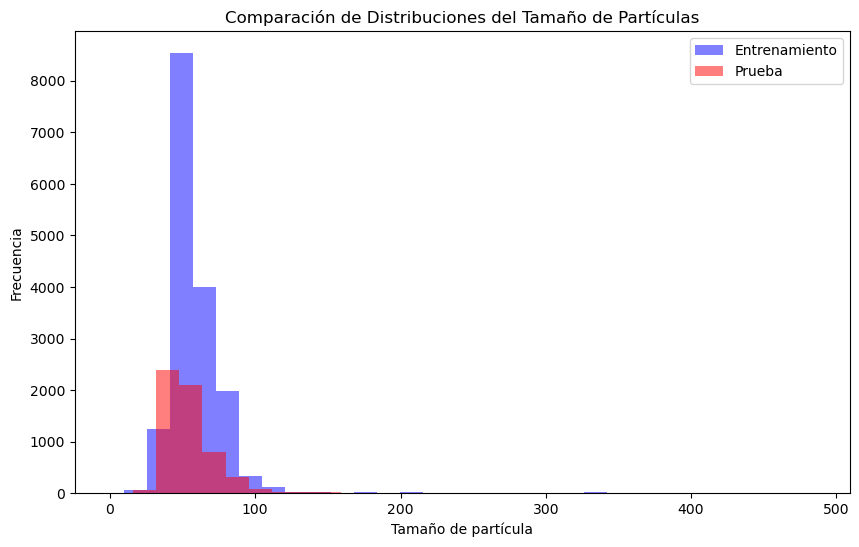

In [16]:
plt.figure(figsize=(10, 6))

plt.hist(gold_recovery_train['rougher.input.feed_size'], bins=30, alpha=0.5, 
         label='Entrenamiento', color='blue')
plt.hist(gold_recovery_test['rougher.input.feed_size'], bins=30, alpha=0.5, 
         label='Prueba', color='red')

plt.title('Comparación de Distribuciones del Tamaño de Partículas')
plt.xlabel('Tamaño de partícula')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [17]:
estadisticas = pd.DataFrame({
    'Entrenamiento': gold_recovery_train['rougher.input.feed_size'].describe(),
    'Prueba': gold_recovery_test['rougher.input.feed_size'].describe()
})

print(estadisticas)

       Entrenamiento       Prueba
count   16443.000000  5834.000000
mean       58.676444    55.937535
std        23.922591    22.724254
min         9.659576     0.046369
25%        47.575879    43.890852
50%        54.104257    50.002004
75%        65.051064    61.638434
max       484.967466   477.445473


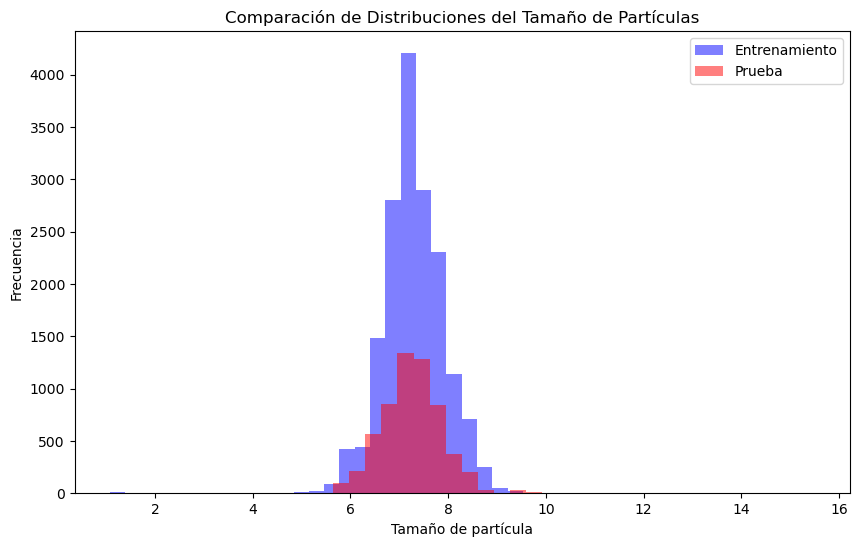

In [18]:
plt.figure(figsize=(10, 6))

plt.hist(gold_recovery_train['primary_cleaner.input.feed_size'], bins=30, alpha=0.5, 
         label='Entrenamiento', color='blue')
plt.hist(gold_recovery_test['primary_cleaner.input.feed_size'], bins=30, alpha=0.5, 
         label='Prueba', color='red')

plt.title('Comparación de Distribuciones del Tamaño de Partículas')
plt.xlabel('Tamaño de partícula')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [19]:
estadisticas = pd.DataFrame({
    'Entrenamiento': gold_recovery_train['primary_cleaner.input.feed_size'].describe(),
    'Prueba': gold_recovery_test['primary_cleaner.input.feed_size'].describe()
})

print(estadisticas)

       Entrenamiento       Prueba
count   16860.000000  5856.000000
mean        7.297285     7.264651
std         0.619166     0.611526
min         1.080000     5.650000
25%         6.940000     6.885625
50%         7.285000     7.259333
75%         7.700000     7.650000
max        10.470000    15.500000


2.3 Concentraciones totales 

In [20]:
gold_recovery_train['feed_total'] = (
    gold_recovery_train['rougher.input.feed_au'] +
    gold_recovery_train['rougher.input.feed_ag'] +
    gold_recovery_train['rougher.input.feed_pb']
)

In [21]:
print(gold_recovery_train['feed_total'])

0        14.871440
1        14.905729
2        14.638299
3        14.199305
4        13.511497
           ...    
16855    16.045275
16856    15.104931
16857    14.515579
16858    14.313448
16859    14.399936
Name: feed_total, Length: 16860, dtype: float64


In [22]:
gold_recovery_train['rougher_total'] = (
    gold_recovery_train['rougher.output.concentrate_au'] +
    gold_recovery_train['rougher.output.concentrate_ag'] +
    gold_recovery_train['rougher.output.concentrate_pb']
)


In [23]:
print(gold_recovery_train['rougher_total'])

0        38.395653
1        38.945647
2        38.649756
3        38.411473
4        38.867359
           ...    
16855    40.712449
16856    40.755632
16857    32.589863
16858    40.148948
16859    40.465768
Name: rougher_total, Length: 16860, dtype: float64


In [24]:
gold_recovery_train['final_total'] = (
    gold_recovery_train['final.output.concentrate_au'] + 
    gold_recovery_train['final.output.concentrate_ag'] + 
    gold_recovery_train['final.output.concentrate_pb']
)


In [25]:
print(gold_recovery_train['final_total'])

0        58.137072
1        58.699942
2        58.927421
3        58.714815
4        59.065251
           ...    
16855    61.295107
16856    61.412113
16857    61.340054
16858    61.401016
16859    61.635645
Name: final_total, Length: 16860, dtype: float64


comparativa 

In [26]:
concentraciones = pd.DataFrame({
    'feed': gold_recovery_train['feed_total'],
    'rougher': gold_recovery_train['rougher_total'], 
    'final': gold_recovery_train['final_total']
})
print("Estadísticas de concentraciones por etapa:")
print(concentraciones.describe())


Estadísticas de concentraciones por etapa:
               feed       rougher         final
count  16631.000000  16778.000000  16788.000000
mean      18.282239     34.862338     53.298306
std        7.324571     13.565124     18.445424
min        0.000000      0.000000      0.000000
25%       16.202056     36.678877     58.551391
50%       18.780145     39.469228     59.991939
75%       22.391464     41.642331     60.938494
max       35.071987     55.568687     65.575259


In [27]:
print("\nValores máximos por etapa:")
print(f"Feed máximo: {concentraciones['feed'].max():.2f}%")
print(f"Rougher máximo: {concentraciones['rougher'].max():.2f}%") 
print(f"Final máximo: {concentraciones['final'].max():.2f}%")

# Contar cuántos valores exceden 100%
print(f"\nValores que exceden 100%:")
print(f"Feed: {(concentraciones['feed'] > 100).sum()} casos")
print(f"Rougher: {(concentraciones['rougher'] > 100).sum()} casos")
print(f"Final: {(concentraciones['final'] > 100).sum()} casos")



Valores máximos por etapa:
Feed máximo: 35.07%
Rougher máximo: 55.57%
Final máximo: 65.58%

Valores que exceden 100%:
Feed: 0 casos
Rougher: 0 casos
Final: 0 casos


Conclusion: Al analizar las concentraciones totales en las etapas del proceso, no se observan valores anormales, todas las concentraciones se presentan debajo del 100% y muestran un incremento esperado durante el proceso de purificacion, esto indica que el proceso opera de forma correcta.

Se puede continuar con el modelo  

In [28]:
def smape(y_true, y_pred):
    """
    Calcula el sMAPE (symmetric Mean Absolute Percentage Error)
    """
    return 100 * np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2))

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Calcula el sMAPE final combinando rougher y final
    """
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    
    return 0.25 * smape_rougher + 0.75 * smape_final


In [29]:
train_cols = set(gold_recovery_train.columns) - {'date', 'rougher.output.recovery', 'final.output.recovery'}
test_cols = set(gold_recovery_test.columns) - {'date'}

# Columnas que están en ambos conjuntos
common_cols = list(train_cols.intersection(test_cols))
print(f"Columnas comunes: {len(common_cols)}")
print("Primeras 10 columnas comunes:", common_cols[:10])

Columnas comunes: 52
Primeras 10 columnas comunes: ['rougher.state.floatbank10_d_air', 'rougher.input.feed_pb', 'secondary_cleaner.state.floatbank4_b_air', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_b_air', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level', 'primary_cleaner.state.floatbank8_d_level']


In [30]:
features_final = gold_recovery_train[common_cols].copy()
target_final = gold_recovery_train['final.output.recovery'].copy()

# Filtrar solo filas donde final.output.recovery no es NaN
valid_indices_final = target_final.notna()
features_final = features_final[valid_indices_final]
target_final = target_final[valid_indices_final]

# Rellenar NaN en features con la media
features_final = features_final.fillna(features_final.mean())

print(f"Filas válidas para final: {len(features_final)}")
print(f"Columnas para entrenar: {features_final.shape[1]}")
print(f"Rango del target: {target_final.min():.2f} - {target_final.max():.2f}")


Filas válidas para final: 15339
Columnas para entrenar: 52
Rango del target: 0.00 - 100.00


In [31]:
features_rougher = gold_recovery_train[common_cols].copy()
target_rougher = gold_recovery_train['rougher.output.recovery'].copy()

# Filtrar filas válidas para rougher
valid_indices_rougher = target_rougher.notna()
features_rougher = features_rougher[valid_indices_rougher]
target_rougher = target_rougher[valid_indices_rougher]

# Rellenar NaN
features_rougher = features_rougher.fillna(features_rougher.mean())

print(f"Filas válidas para rougher: {len(features_rougher)}")
print(f"Rango del target rougher: {target_rougher.min():.2f} - {target_rougher.max():.2f}")



Filas válidas para rougher: 14287
Rango del target rougher: 0.00 - 100.00


In [32]:
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    features_final, 
    target_final, 
    test_size=0.2, 
    random_state=42
)

print(f"Datos de entrenamiento: {X_train_final.shape[0]} filas")
print(f"Datos de validación: {X_val_final.shape[0]} filas")


Datos de entrenamiento: 12271 filas
Datos de validación: 3068 filas


In [33]:
model_final = LinearRegression()
model_final.fit(X_train_final, y_train_final)

# Hacer predicciones en el conjunto de validación
y_pred_final = model_final.predict(X_val_final)

print("Modelo de final recovery entrenado exitosamente!")
print(f"Predicciones generadas: {len(y_pred_final)}")
print(f"Rango de predicciones: {y_pred_final.min():.2f} - {y_pred_final.max():.2f}")


Modelo de final recovery entrenado exitosamente!
Predicciones generadas: 3068
Rango de predicciones: 45.03 - 113.33


In [34]:
smape_final = smape(y_val_final, y_pred_final)

print(f"sMAPE para final recovery: {smape_final:.4f}")
print(f"Valores reales - rango: {y_val_final.min():.2f} - {y_val_final.max():.2f}")
print(f"Predicciones - rango: {y_pred_final.min():.2f} - {y_pred_final.max():.2f}")


sMAPE para final recovery: 10.2216
Valores reales - rango: 0.00 - 100.00
Predicciones - rango: 45.03 - 113.33


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Excelente trabajo con el calculo de la metrica sMAPE personalizada, con esto ponderamos de forma correcta la importancia relativa en cada una de las etapas. Esto ayuda a entender el impacto relativo de cada error.  


In [35]:

X_train_rougher, X_val_rougher, y_train_rougher, y_val_rougher = train_test_split(
    features_rougher, 
    target_rougher, 
    test_size=0.2, 
    random_state=42
)

print(f"Datos de entrenamiento rougher: {X_train_rougher.shape[0]} filas")
print(f"Datos de validación rougher: {X_val_rougher.shape[0]} filas")


Datos de entrenamiento rougher: 11429 filas
Datos de validación rougher: 2858 filas


In [36]:
model_rougher = LinearRegression()
model_rougher.fit(X_train_rougher, y_train_rougher)

# Hacer predicciones en el conjunto de validación
y_pred_rougher = model_rougher.predict(X_val_rougher)

print("Modelo de rougher recovery entrenado exitosamente!")
print(f"Predicciones generadas: {len(y_pred_rougher)}")
print(f"Rango de predicciones: {y_pred_rougher.min():.2f} - {y_pred_rougher.max():.2f}")


Modelo de rougher recovery entrenado exitosamente!
Predicciones generadas: 2858
Rango de predicciones: 44.84 - 103.98


In [37]:
smape_rougher = smape(y_val_rougher, y_pred_rougher)

print(f"sMAPE para rougher recovery: {smape_rougher:.4f}")
print(f"Valores reales - rango: {y_val_rougher.min():.2f} - {y_val_rougher.max():.2f}")
print(f"Predicciones - rango: {y_pred_rougher.min():.2f} - {y_pred_rougher.max():.2f}")

print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS:")
print("="*50)
print(f"Final recovery sMAPE:   {smape_final:.4f}")
print(f"Rougher recovery sMAPE: {smape_rougher:.4f}")

sMAPE para rougher recovery: 11.1599
Valores reales - rango: 0.00 - 100.00
Predicciones - rango: 44.84 - 103.98

COMPARACIÓN DE MODELOS:
Final recovery sMAPE:   10.2216
Rougher recovery sMAPE: 11.1599


In [38]:
print((0.25 * 11.1599) + (0.75 * 10.2216))


10.456175


El modelo de regresion linear no es aceptable puesto que tiene un sMAPE de 10 y las predicciones pueden llegar a ser mayores a cien, por lo cual vale la pena probar otros modelos. 

In [39]:

rf_final = RandomForestRegressor(
    n_estimators=100,    
    random_state=42,
    min_samples_split=3,
    max_depth=30
)



In [ ]:
rf_final.fit(X_train_final, y_train_final)

In [41]:
y_pred_rf_final = rf_final.predict(X_val_final)


In [42]:

print(f"Predicciones mínimas: {y_pred_rf_final.min():.2f}%")
print(f"Predicciones máximas: {y_pred_rf_final.max():.2f}%")
print(f"Predicciones > 100%: {(y_pred_rf_final > 100).sum()} de {len(y_pred_rf_final)}")


Predicciones mínimas: 12.09%
Predicciones máximas: 100.00%
Predicciones > 100%: 0 de 3068


In [43]:
smape_rf_final = smape(y_val_final, y_pred_rf_final)
print(f"sMAPE Random Forest (final): {smape_rf_final:.4f}")


sMAPE Random Forest (final): 6.9509


In [44]:
print("="*50)
print("COMPARACIÓN DE MODELOS PARA FINAL RECOVERY:")
print("="*50)
print(f"Regresión Lineal sMAPE:  {smape_final:.4f}")
print(f"Random Forest sMAPE:     {smape_rf_final:.4f}")
print(f"Mejora: {smape_final - smape_rf_final:.4f} puntos")


COMPARACIÓN DE MODELOS PARA FINAL RECOVERY:
Regresión Lineal sMAPE:  10.2216
Random Forest sMAPE:     6.9509
Mejora: 3.2708 puntos


In [45]:
rf_model_rougher = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10
)

# Entrenar el modelo
rf_model_rougher.fit(X_train_rougher, y_train_rougher)
print("Modelo Random Forest para rougher recovery entrenado!")


Modelo Random Forest para rougher recovery entrenado!


In [46]:
y_pred_rf_rougher = rf_model_rougher.predict(X_val_rougher)
print(f"Rango de predicciones RF rougher: {y_pred_rf_rougher.min():.2f} - {y_pred_rf_rougher.max():.2f}")


Rango de predicciones RF rougher: 2.49 - 95.42


In [47]:
def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Calcula el sMAPE final combinando rougher y final
    """
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final


In [48]:
smape_rf_rougher = smape(y_val_rougher, y_pred_rf_rougher)
print(f"sMAPE Random Forest (rougher): {smape_rf_rougher:.4f}")


sMAPE Random Forest (rougher): 9.5024


In [49]:
smape_combinado_rf= (0.25 * smape_rf_rougher) + (0.75 * smape_final)
print(smape_combinado_rf)

10.04184120379935


In [50]:


print("="*60)
print("RESULTADO FINAL - RANDOM FOREST")
print("="*60)
print(f"sMAPE Rougher Recovery:  {smape_rf_rougher:.4f}")
print(f"sMAPE Final Recovery:    {smape_rf_final:.4f}")
print(f"sMAPE COMBINADO FINAL:   {smape_combinado_rf:.4f}")
print("="*60)


RESULTADO FINAL - RANDOM FOREST
sMAPE Rougher Recovery:  9.5024
sMAPE Final Recovery:    6.9509
sMAPE COMBINADO FINAL:   10.0418


In [51]:
smape_combinado = final_smape(
    y_val_rougher,      # valores reales rougher
    y_pred_rf_rougher,  # predicciones Random Forest rougher
    y_val_final,        # valores reales final
    y_pred_rf_final     # predicciones Random Forest final
)

print(f"sMAPE COMBINADO FINAL:   {smape_combinado:.4f}")


sMAPE COMBINADO FINAL:   7.5888


al obtener un resultado de 7.58 de sMAPE combinado con el Random Forest Regressor se pasa a hacer la validacion cruzada 

In [52]:
tscv = TimeSeriesSplit(n_splits=5)

In [53]:
def cross_validate_models(features_rougher, target_rougher, features_final, target_final, tscv):
    """
    Realiza validación cruzada para ambos modelos y calcula sMAPE combinado
    """
    smape_scores = []
    
    for train_idx, val_idx in tscv.split(features_rougher):
        # Dividir datos para rougher
        X_train_r, X_val_r = features_rougher.iloc[train_idx], features_rougher.iloc[val_idx]
        y_train_r, y_val_r = target_rougher.iloc[train_idx], target_rougher.iloc[val_idx]
        
        # Entrenar modelo rougher
        rf_rougher = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_rougher.fit(X_train_r, y_train_r)
        y_pred_r = rf_rougher.predict(X_val_r)
        
        # Hacer lo mismo para final (usando los mismos índices válidos)
        # Aquí necesitamos alinear los índices...
        
    return smape_scores


In [54]:
valid_rougher = gold_recovery_train['rougher.output.recovery'].notna()
valid_final = gold_recovery_train['final.output.recovery'].notna()
both_valid = valid_rougher & valid_final

print(f"Filas con rougher válido: {valid_rougher.sum()}")
print(f"Filas con final válido: {valid_final.sum()}")
print(f"Filas con AMBOS válidos: {both_valid.sum()}")



Filas con rougher válido: 14287
Filas con final válido: 15339
Filas con AMBOS válidos: 14149


In [55]:
print("Columnas en el dataset:")
print(gold_recovery_train.columns.tolist())


Columnas en el dataset:
['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state

In [56]:
target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Todas las columnas excepto los targets
features = [col for col in gold_recovery_train.columns if col not in target_columns]

print(f"Features seleccionadas: {len(features)} columnas")
print("Primeras 10 features:", features[:10])


Features seleccionadas: 88 columnas
Primeras 10 features: ['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate']


In [57]:
data_filtered = gold_recovery_train[both_valid].copy()

# Preparar features y targets
features_filtered = data_filtered[features]
target_rougher_filtered = data_filtered['rougher.output.recovery']
target_final_filtered = data_filtered['final.output.recovery']

print(f"Datos filtrados: {len(data_filtered)} filas")
print(f"Período: {data_filtered.index.min()} a {data_filtered.index.max()}")
print(f"Características: {features_filtered.shape[1]} columnas")


Datos filtrados: 14149 filas
Período: 0 a 16859
Características: 88 columnas


In [58]:
cv_scores = []

print("Iniciando validación cruzada temporal...")
print("="*50)


Iniciando validación cruzada temporal...


In [59]:
print("Verificando datos disponibles:")
print(f"data_filtered shape: {data_filtered.shape}")
print(f"features disponibles: {len(features)}")


Verificando datos disponibles:
data_filtered shape: (14149, 90)
features disponibles: 88


In [60]:
columns_to_exclude = ['rougher.output.recovery', 'final.output.recovery']
if 'date' in features:
    columns_to_exclude.append('date')

features_for_cv = [col for col in features if col not in columns_to_exclude]

print(f"Características originales: {len(features)}")
print(f"Características para CV: {len(features_for_cv)}")
print(f"Columnas excluidas: {columns_to_exclude}")


Características originales: 88
Características para CV: 87
Columnas excluidas: ['rougher.output.recovery', 'final.output.recovery', 'date']


In [61]:
X_cv = data_filtered[features_for_cv].copy()
y_rougher_cv = data_filtered['rougher.output.recovery'].copy()
y_final_cv = data_filtered['final.output.recovery'].copy()

# Rellenar valores faltantes
X_cv = X_cv.fillna(X_cv.mean())

print(f"X_cv shape: {X_cv.shape}")
print(f"y_rougher_cv shape: {y_rougher_cv.shape}")
print(f"y_final_cv shape: {y_final_cv.shape}")


X_cv shape: (14149, 87)
y_rougher_cv shape: (14149,)
y_final_cv shape: (14149,)


In [62]:
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_cv), 1):
    print(f"\nFold {fold}:")
    print(f"  Entrenamiento: {len(train_idx)} muestras")
    print(f"  Validación: {len(val_idx)} muestras")
    
    # Dividir datos
    X_train, X_val = X_cv.iloc[train_idx], X_cv.iloc[val_idx]
    y_train_r, y_val_r = y_rougher_cv.iloc[train_idx], y_rougher_cv.iloc[val_idx]
    y_train_f, y_val_f = y_final_cv.iloc[train_idx], y_final_cv.iloc[val_idx]
    
    # Entrenar modelos Random Forest
    rf_rougher = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    rf_final = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    
    rf_rougher.fit(X_train, y_train_r)
    rf_final.fit(X_train, y_train_f)
    
    # Hacer predicciones
    pred_rougher = rf_rougher.predict(X_val)
    pred_final = rf_final.predict(X_val)
    
    # Calcular sMAPE combinado
    smape_score = final_smape(y_val_r, pred_rougher, y_val_f, pred_final)
    cv_scores.append(smape_score)
    
    print(f"  sMAPE combinado: {smape_score:.4f}")

print("\n" + "="*50)
print("RESULTADOS DE VALIDACIÓN CRUZADA:")
print(f"sMAPE promedio: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar: {np.std(cv_scores):.4f}")
print(f"Scores por fold: {[f'{score:.4f}' for score in cv_scores]}")



Fold 1:
  Entrenamiento: 2359 muestras
  Validación: 2358 muestras
  sMAPE combinado: 5.3380

Fold 2:
  Entrenamiento: 4717 muestras
  Validación: 2358 muestras
  sMAPE combinado: 4.2490

Fold 3:
  Entrenamiento: 7075 muestras
  Validación: 2358 muestras
  sMAPE combinado: 2.1741

Fold 4:
  Entrenamiento: 9433 muestras
  Validación: 2358 muestras
  sMAPE combinado: 3.5075

Fold 5:
  Entrenamiento: 11791 muestras
  Validación: 2358 muestras
  sMAPE combinado: 2.8556

RESULTADOS DE VALIDACIÓN CRUZADA:
sMAPE promedio: 3.6248
Desviación estándar: 1.0986
Scores por fold: ['5.3380', '4.2490', '2.1741', '3.5075', '2.8556']


In [63]:
print("Entrenando modelos finales con todos los datos...")

# Modelo para rougher recovery
rf_rougher_final = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_rougher_final.fit(X_cv, y_rougher_cv)

# Modelo para final recovery  
rf_final_final = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_final_final.fit(X_cv, y_final_cv)

print("Modelos finales entrenados exitosamente!")


Entrenando modelos finales con todos los datos...
Modelos finales entrenados exitosamente!


In [64]:
print("Columnas disponibles en el conjunto de prueba:")
print(f"Total columnas comunes: {len(common_cols)}")

# Preparar datos de prueba con las columnas correctas
X_test = gold_recovery_test[common_cols].copy()
X_test = X_test.fillna(X_test.mean())  # Rellenar con la media del conjunto de prueba

print(f"Datos de prueba preparados: {X_test.shape}")
print("¡Ahora sí podemos hacer predicciones!")


Columnas disponibles en el conjunto de prueba:
Total columnas comunes: 52
Datos de prueba preparados: (5856, 52)
¡Ahora sí podemos hacer predicciones!


In [65]:
print("Entrenando modelos finales con las columnas correctas...")

# Usar solo las columnas comunes para entrenar
X_cv_common = data_filtered[common_cols].copy()
X_cv_common = X_cv_common.fillna(X_cv_common.mean())

# Entrenar modelos con las columnas correctas
rf_rougher_final = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_rougher_final.fit(X_cv_common, y_rougher_cv)

rf_final_final = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_final_final.fit(X_cv_common, y_final_cv)

print("Modelos finales entrenados exitosamente con las columnas correctas!")
print(f"Entrenados con {X_cv_common.shape[1]} características")



Entrenando modelos finales con las columnas correctas...
Modelos finales entrenados exitosamente con las columnas correctas!
Entrenados con 52 características


In [66]:
print("Haciendo predicciones en el conjunto de prueba...")

# Predicciones para rougher recovery
pred_rougher_test = rf_rougher_final.predict(X_test)

# Predicciones para final recovery
pred_final_test = rf_final_final.predict(X_test)

print(f"Predicciones rougher recovery: {len(pred_rougher_test)} valores")
print(f"Predicciones final recovery: {len(pred_final_test)} valores")
print("¡Predicciones completadas exitosamente!")

# Mostrar algunas predicciones de ejemplo
print(f"\nPrimeras 5 predicciones rougher recovery: {pred_rougher_test[:5]}")
print(f"Primeras 5 predicciones final recovery: {pred_final_test[:5]}")


Haciendo predicciones en el conjunto de prueba...
Predicciones rougher recovery: 5856 valores
Predicciones final recovery: 5856 valores
¡Predicciones completadas exitosamente!

Primeras 5 predicciones rougher recovery: [85.12908396 84.08128675 83.26455529 85.69188236 85.82698408]
Primeras 5 predicciones final recovery: [68.56742665 68.92921875 68.88932303 69.53044581 68.85526343]


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>

Gran trabajo con el desarrollo del proyecto. Aplicar técnicas como la normalización, estandarización mejora significativamente la estabilidad numérica de los modelos y garantiza que todas las variables contribuyan de manera equitativa al proceso de aprendizaje. Esto fortalece la interpretabilidad y el rendimiento del modelo.

La evaluación del modelo usando validación cruzda es muy efectiva para este tipo de análisis. 
</div>

"Al entrenar dos modelos (1.- Regresión Lineal y 2.- Random Forest Regressor) se observó que el segundo modelo fue más exitoso, ya que logró un sMAPE combinado de 7.59 vs 10.46 de la regresión lineal, y además generó predicciones más realistas (0-100%). Por lo cual se procedió a hacer la validación cruzada con ese mismo.

Se utilizó validación cruzada temporal para evaluar el modelo de manera más robusta, considerando la naturaleza temporal de los datos del proceso industrial.

Al finalizar la validación cruzada temporal se encontró que el sMAPE promedio fue de 3.62 ± 1.10, lo cual representa una mejora significativa respecto a la evaluación inicial. Es por esto que se recomienda usar el modelo de Random Forest Regressor para obtener las mejores predicciones de recuperación de oro en ambas etapas del proceso (rougher y final)." 